In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# https://github.com/openZH/covid_19.git
filepath = 'C:\\Users\\janal\\OneDrive\\Dokumente\\GitHub\\covid_19\\'
filename = 'COVID19_Fallzahlen_CH_total_v2.csv'
file = filepath + filename
rawdata = pd.read_csv(file)
dataCH = rawdata.groupby(by = 'date').sum()
set1 = dataCH['ncumul_conf']
set1 = np.array(set1)

In [16]:
# https://github.com/daenuprobst/covid19-cases-switzerland
filepath = 'C:\\Users\\janal\\OneDrive\\Dokumente\\GitHub\\covid19-cases-switzerland\\'
filename = 'covid19_cases_switzerland_openzh.csv'
file = filepath + filename
rawdata = pd.read_csv(file)
set2 = np.array(rawdata['CH'])

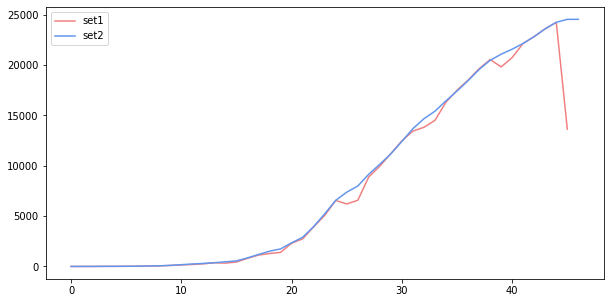

In [19]:
# first derivative of confirmed cases per Mil

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,1,1)

x1 = np.arange(len(set1))
x2 = np.arange(len(set2))

ax1.plot(x1,set1, color = 'lightcoral', label = 'set1')
ax1.plot(x2,set2, color = 'cornflowerblue', label = 'set2')

# legend
ax1.legend()

plt.show()

## Prep for the ZH dataset (cheesy)

In [ ]:
# covid data: https://github.com/openZH/covid_19.git
# population: https://en.wikipedia.org/wiki/Demographics_of_Switzerland

filepath = 'C:\\Users\\janal\\OneDrive\\Dokumente\\GitHub\\covid_19\\'
filename = 'COVID19_Fallzahlen_CH_total_v2.csv'
file = filepath + filename

rawdataCH = pd.read_csv(file)

dataCH = rawdataCH.groupby(by = 'date').sum()
dataCH = dataCH[dataCH['ncumul_conf'] >= 100]

dataCH = dataCH.reset_index()
dataCH = dataCH.rename(columns = {'ncumul_tested': 'tested','ncumul_conf':'confirmed', 'ncumul_deceased':'dead'})
dataCH = dataCH[['date','confirmed','tested','dead']]
dataCH['confirmedPerMillion'] = dataCH.confirmed/(populationCH/1000000)
dataCH['deadPerMillion'] = dataCH.dead/(populationCH/1000000)
dataCH['daysSinceConfirmed100'] = np.arange(1,len(dataCH)+1,1)
dataCH['daysSinceDeath1'] = dataCH.index - dataCH.index[dataCH.dead > 0][0]
dataCH['daysSinceDeath10'] = dataCH.index - dataCH.index[dataCH.dead >= 10][0]

#### only, if last row is messy/incomplete ####
dataCH = dataCH.iloc[:-1]

# create np.arrays out of columns
confirmedCH2 = np.array(dataCH['confirmed'])
testedCH2 = np.array(dataCH['tested'])
deadCH2 = np.array(dataCH['dead'])
datesCH2 = np.array(dataCH['date'])
daysSinceConfirmed100CH2 = np.array(dataCH['daysSinceConfirmed100'])
daysSinceDeath1CH2 = np.array(dataCH['daysSinceDeath1'])
daysSinceDeath10CH2 = np.array(dataCH['daysSinceDeath10'])
confirmedPerMilCH2 = np.array(dataCH['confirmedPerMillion'])
deadPerMilCH2 = np.array(dataCH['deadPerMillion'])

dataCH2 = copy.deepcopy(dataCH)